In [17]:
import cv2
from ultralytics import YOLO


model = YOLO('yolov8x.pt')


def detect_objects(image):
    results = model(image)[0]

    detections = []
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        detections.append([int(x1), int(y1), int(x2), int(y2), round(score, 3),
                           results.names[int(class_id)]])

    return detections


for detection in detect_objects('./run/examples/model/0001.jpg'):
    print(detection)


image 1/1 e:\VirtualFitting_System\AI\run\examples\model\0001.jpg: 640x480 1 person, 300.3ms
Speed: 3.0ms preprocess, 300.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
[108, 8, 638, 1021, 0.958, 'person']



image 1/1 e:\VirtualFitting_System\AI\run\examples\model\0001.jpg: 640x480 1 person, 22.0ms
Speed: 3.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


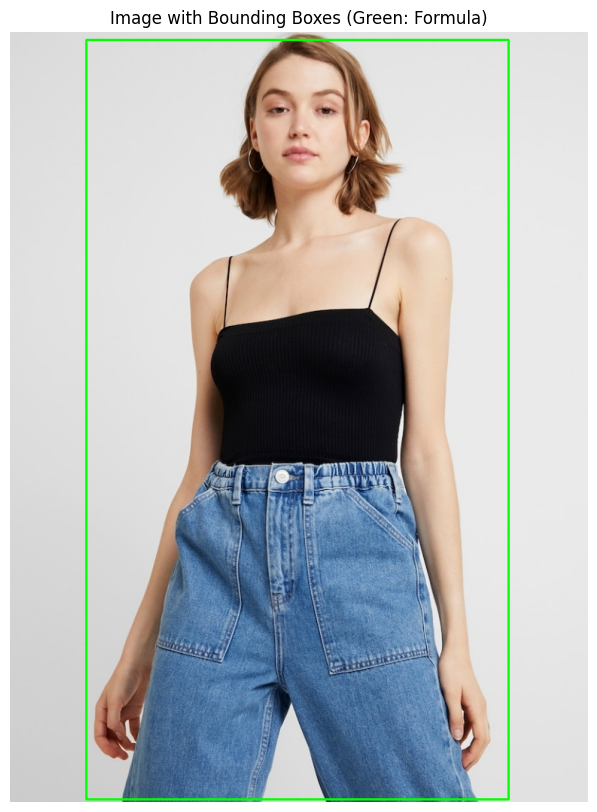

In [33]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO('yolov8n.pt')

def detect_objects(image):
    results = model(image)[0]

    detections = []
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        detections.append([int(x1), int(y1), int(x2), int(y2), round(score, 3),
                           results.names[int(class_id)]])
    return detections

# Load the image
image_path = './run/examples/model/0001.jpg'
image = cv2.imread(image_path)

# Detect objects in the image
for detection in detect_objects(image_path):
    x1, y1, x2, y2, score, class_name = detection
    # Draw bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green: Formula

# Convert image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes inline
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Image with Bounding Boxes (Green: Formula)')
plt.show()



image 1/1 e:\VirtualFitting_System\AI\run\examples\garment\top01.jpg: 640x448 (no detections), 21.0ms
Speed: 3.0ms preprocess, 21.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)


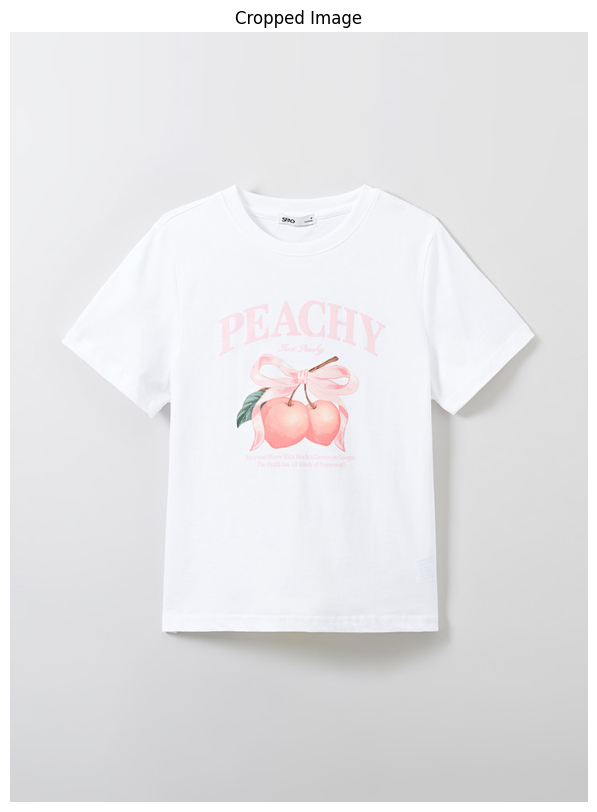

In [39]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

model = YOLO('yolov8n.pt')

def detect_objects(image):
    results = model(image)[0]

    detections = []
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        detections.append([int(x1), int(y1), int(x2), int(y2), round(score, 3), results.names[int(class_id)]])
    return detections

def crop_image(image, width_ratio, height_ratio, crop_position, crop_box=None):
    """
    이미지를 주어진 비율과 위치에 맞게 자르는 함수
    
    Parameters:
        image (PIL.Image.Image): 자를 이미지의 PIL Image 객체
        width_ratio (float): 너비 비율
        height_ratio (float): 높이 비율
        crop_position (str): 이미지를 자를 위치 ('center', 'bottom', 'top')
        crop_box (tuple): 잘라낼 박스의 좌표 (x1, y1, x2, y2), optional
        
    Returns:
        PIL.Image.Image: 자른 이미지의 PIL Image 객체
    """
    # 이미지 크기 가져오기
    width, height = image.size
    
    # 목표 비율 계산
    target_ratio = width_ratio / height_ratio
    
    # 현재 이미지의 비율
    current_ratio = width / height
    
    # 이미지를 자를 좌표 계산
    if current_ratio > target_ratio:
        # 이미지가 더 넓을 경우: 가로를 기준으로 자르기
        new_width = int(height * target_ratio)
        new_height = height
    else:
        # 이미지가 더 높을 경우: 세로를 기준으로 자르기
        new_width = width
        new_height = int(width / target_ratio)
    
    # 감지된 객체 중심으로 자르기
    if crop_box:
        x1, y1, x2, y2 = crop_box
        center_x = (x1 + x2) // 2
        center_y = (y1 + y2) // 2
        left = max(0, center_x - new_width // 2)
        top = max(0, center_y - new_height // 2)
        right = min(width, center_x + new_width // 2)
        bottom = min(height, center_y + new_height // 2)
        if right - left < new_width:
            left = max(0, right - new_width)
        if bottom - top < new_height:
            top = max(0, bottom - new_height)
    else:
        # 이미지를 자를 위치에 따라 좌표 설정
        if crop_position == 'center':
            left = (width - new_width) / 2
            top = (height - new_height) / 2
            right = (width + new_width) / 2
            bottom = (height + new_height) / 2
        elif crop_position == 'bottom':
            left = (width - new_width) / 2
            top = height - new_height
            right = (width + new_width) / 2
            bottom = height
        elif crop_position == 'top':
            left = (width - new_width) / 2
            top = 0
            right = (width + new_width) / 2
            bottom = new_height
        else:
            raise ValueError("crop_position must be 'center', 'bottom', or 'top'")
    
    # 이미지 자르기
    return image.crop((left, top, right, bottom))

# Load the image
image_path = './run/examples/garment/top01.jpg'
image = cv2.imread(image_path)
image_pil = Image.open(image_path)

# Detect objects in the image
detections = detect_objects(image_path)

if detections:
    # 첫 번째 감지된 객체의 bounding box 사용
    x1, y1, x2, y2, score, class_name = detections[0]
    crop_box = (x1, y1, x2, y2)
    cropped_image = crop_image(image_pil, 3, 4, 'center', crop_box=crop_box)
else:
    cropped_image = crop_image(image_pil, 3, 4, 'center')

# Convert cropped image from PIL to numpy array for displaying
cropped_image_np = np.array(cropped_image)

# Display the cropped image
plt.figure(figsize=(10, 10))
plt.imshow(cropped_image_np)
plt.axis('off')
plt.title('Cropped Image')
plt.show()



image 1/1 e:\VirtualFitting_System\AI\run\examples\model\0003.jpg: 448x640 1 person, 71.0ms
Speed: 6.0ms preprocess, 71.0ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)


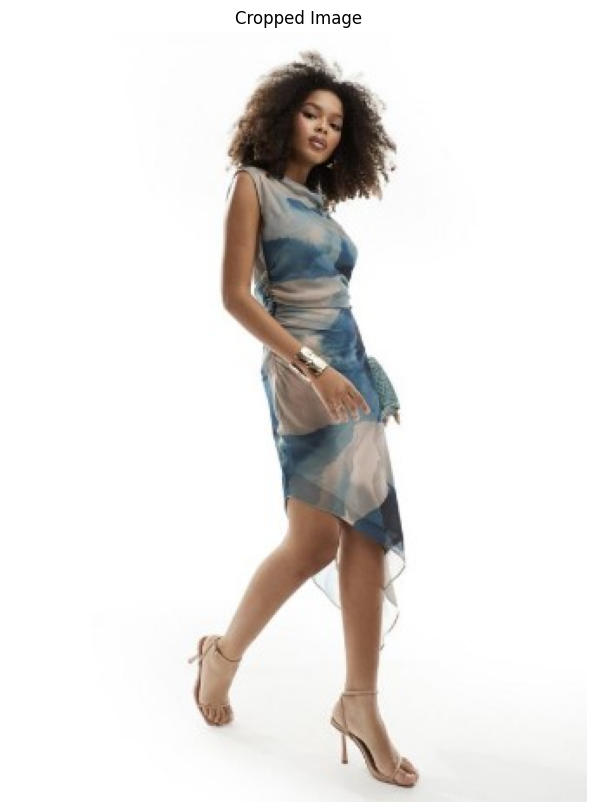

Cropped image size: (333, 445)


In [43]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

model = YOLO('yolov8n.pt')

def detect_objects(image):
    results = model(image)[0]

    detections = []
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        detections.append([int(x1), int(y1), int(x2), int(y2), round(score, 3),
                           results.names[int(class_id)]])
    return detections

def crop_image(image, width_ratio, height_ratio, crop_box=None):

    # 이미지 크기 가져오기
    width, height = image.size
    
    # 목표 비율 계산
    target_ratio = width_ratio / height_ratio
    
    # 현재 이미지의 비율
    current_ratio = width / height
    
    # 이미지를 자를 좌표 계산
    if current_ratio > target_ratio:
        # 이미지가 더 넓을 경우: 가로를 기준으로 자르기
        new_width = int(height * target_ratio)
        new_height = height
    else:
        # 이미지가 더 높을 경우: 세로를 기준으로 자르기
        new_width = width
        new_height = int(width / target_ratio)
    
    # 감지된 객체 중심으로 자르기
    if crop_box:
        x1, y1, x2, y2 = crop_box
        center_x = (x1 + x2) // 2
        center_y = (y1 + y2) // 2
        left = max(0, center_x - new_width // 2)
        top = max(0, center_y - new_height // 2)
        right = min(width, center_x + new_width // 2)
        bottom = min(height, center_y + new_height // 2)
        if right - left < new_width:
            left = max(0, right - new_width)
        if bottom - top < new_height:
            top = max(0, bottom - new_height)
    else:
        # 이미지를 중앙에서 자르기
        left = (width - new_width) / 2
        top = (height - new_height) / 2
        right = (width + new_width) / 2
        bottom = (height + new_height) / 2
    
    # 이미지 자르기
    return image.crop((left, top, right, bottom))

# Load the image
image_path = './run/examples/model/0003.jpg'
image = cv2.imread(image_path)
image_pil = Image.open(image_path)

# Detect objects in the image
detections = detect_objects(image_path)

if detections:
    # 첫 번째 감지된 객체의 bounding box 사용
    x1, y1, x2, y2, score, class_name = detections[0]
    crop_box = (x1, y1, x2, y2)
    cropped_image = crop_image(image_pil, 3, 4, crop_box=crop_box)
else:
    cropped_image = crop_image(image_pil, 3, 4)

# Convert cropped image from PIL to numpy array for displaying
cropped_image_np = np.array(cropped_image)

# Display the cropped image
plt.figure(figsize=(10, 10))
plt.imshow(cropped_image_np)
plt.axis('off')
plt.title('Cropped Image')
plt.show()

# Print the size of the cropped image
print("Cropped image size:", cropped_image.size)
